In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import quimb as qu
import quimb.tensor as qtn
from quimb.experimental import tnvmc

In [2]:
Lx = Ly = 4
D = 2
psi = qtn.PEPS.rand(Lx, Ly, D, seed=42)
ham = qtn.ham_2d_heis(Lx, Ly)

In [3]:
# su = qtn.SimpleUpdate(psi, ham, compute_energy_per_site=True)
# su.evolve(Lx * Ly, tau=0.3)
# psi = su.state

In [4]:
for i, j in psi.gen_site_coos():
    for coo_n in [
        (i, j - 1),
        (i, j + 1),
        (i - 1, j),
        (i + 1, j)
    ]:
        if psi.valid_coo(coo_n):
            psi[coo_n].new_ind(psi.site_ind((i, j)), size=2, mode='repeat')

In [5]:
sampler = tnvmc.DenseSampler(seed=42)

In [6]:
tnopt = tnvmc.TNVMC(
    psi=psi,
    ham=ham,
    sampler=tnvmc.DenseSampler(seed=42),
    # optimizer='adam', learning_rate=0.01,
    optimizer='minsr', learning_rate=1.0,
)

In [7]:
# tnopt.measure()

In [8]:
sum(t.size for t in psi)

3200

In [9]:
# def callback(x):
#     x.optimizer.learning_rate = x.moving_stats.var * 50

# tnopt.callback = callback

In [10]:
tnopt.optimizer.learning_rate = 1.0

In [13]:
tnopt.run(batchsize=2**7, total=2**12)

  0%|          | 0/4096 [00:00<?, ?it/s]


BufferError: cannot resize an array that is exporting buffers

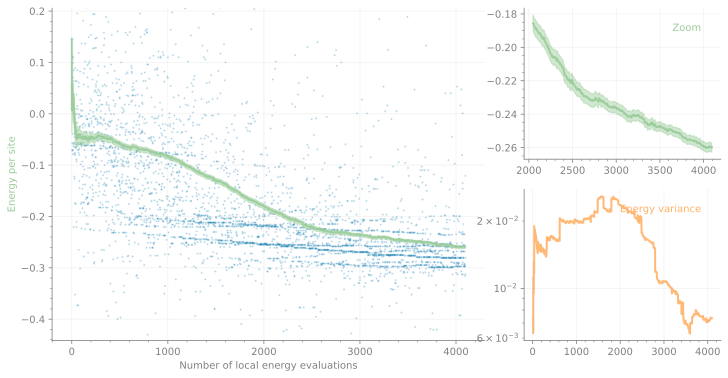

(<Figure size 1200x600 with 3 Axes>, <Axes: >)

In [12]:
tnopt.plot()